Importing python libraries

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Importing the csv file

In [375]:
df = pd.read_csv('Sales_data.csv', encoding='unicode_escape')

#UTF-8 decoder encountered a problem.
#The unicode_escape encoding is particularly useful when working with data that contains Unicode escape sequences and you want to convert those escape sequences into actual Unicode characters


In [376]:
df.shape

(11251, 15)

In [377]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [379]:
#dropping null data
df.drop(['Status' , 'unnamed1'], axis = 1, inplace=True)

In [380]:
# check null vaues
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [381]:
# drop null values
df.dropna(inplace = True)

In [382]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [383]:
df['Amount'].dtypes

dtype('int32')

In [384]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [385]:
# rename column 
df.rename(columns = {'Zone' : 'Region'},inplace=True)

In [386]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [387]:
# use describe for specific columns

df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


So, from this data, we can conclude that the average age of the customer is 35 years, and on average, every customer is buying 2-3 products

# Exploratory Data Analysis

**Gender**

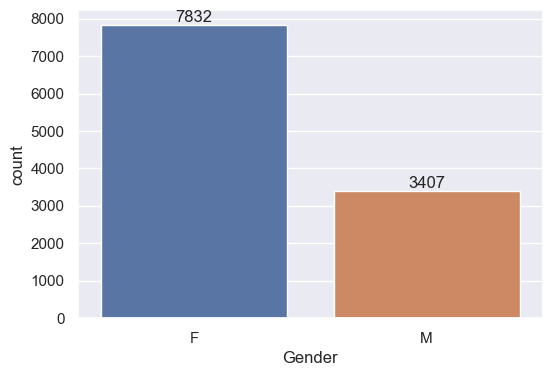

In [404]:
# plotting a bar chart for gender and its count

ax = sns.countplot(x= 'Gender' , data = df )

sns.set(rc={'figure.figsize': (6,4)})


for bars in ax.containers:
    ax.bar_label(bars)

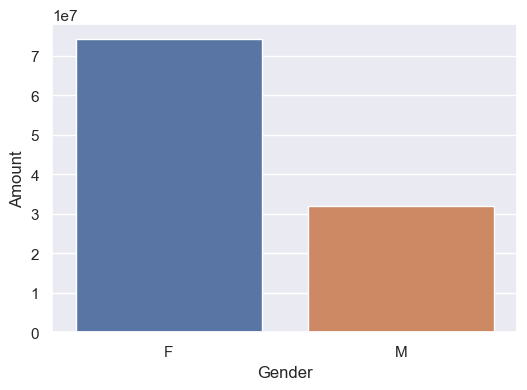

In [389]:
# plotting a bar chart for Gender vs Amount

sales = df.groupby(['Gender'], as_index = False) ['Amount'].sum() ;

ax = sns.barplot(x = 'Gender', y = 'Amount', data = sales)

sns.set(rc={'figure.figsize': (6,4)})



From above graphs we can clearly see that most of the buyers are females and even the purchasing power of females are greater than men

# Age

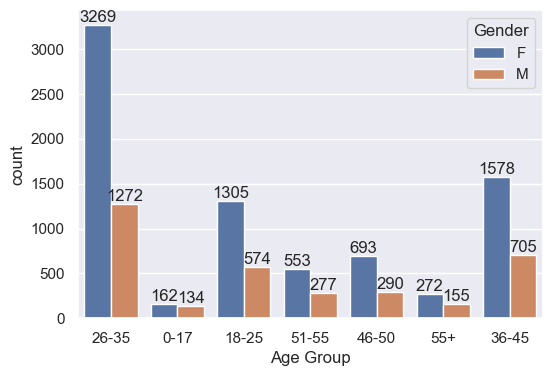

In [390]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)
    
sns.set(rc={'figure.figsize': (6,5)})

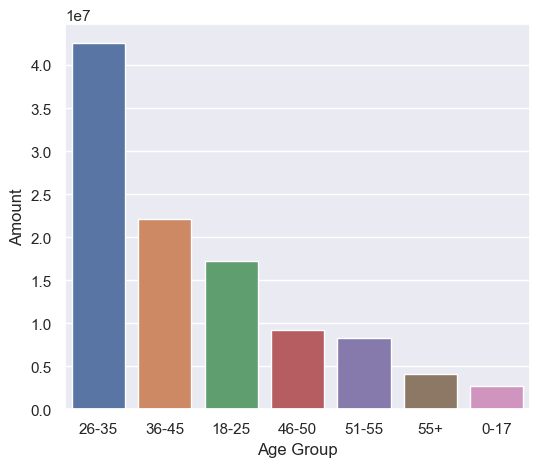

In [391]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

sns.set(rc={'figure.figsize': (10,7)})


From above graphs we can see that most of the buyers are of age group between 26-35 yrs and minimum buyers are fro 0-17 age group 

# State

**Total number of orders from 10 states**

<Axes: xlabel='State', ylabel='Orders'>

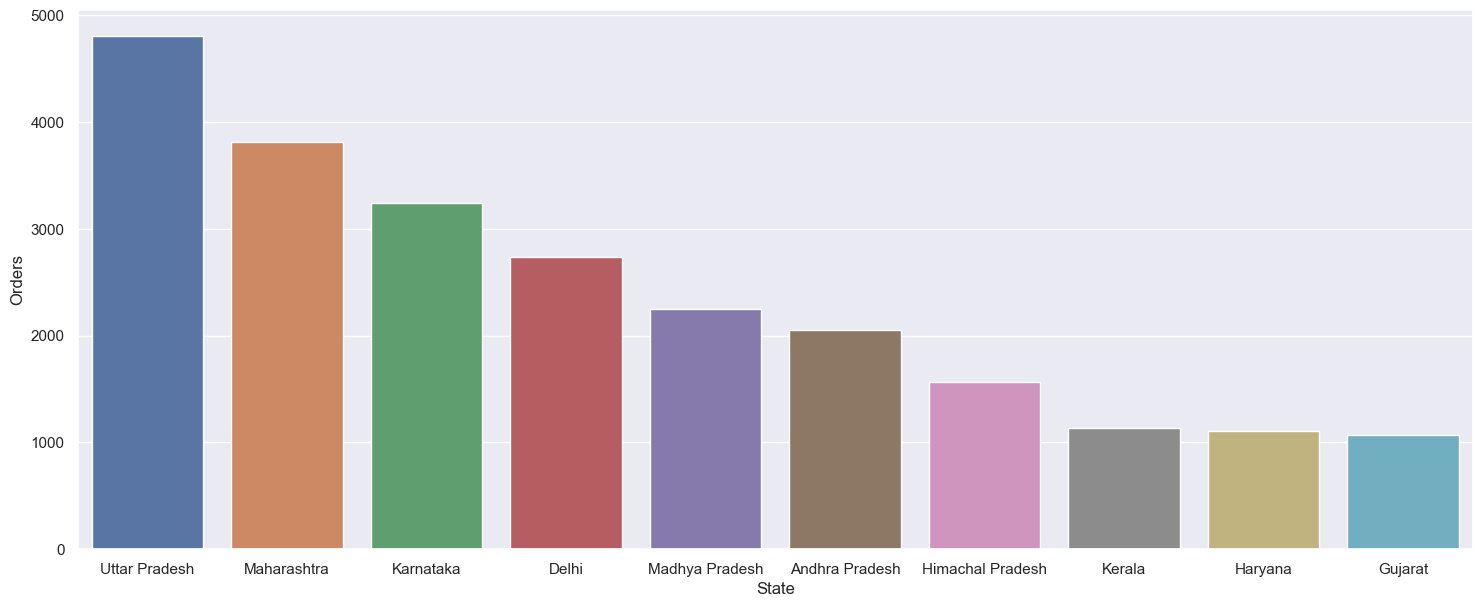

In [392]:
# Grouping by 'State' and summing the 'Orders'
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(18,7)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')


From above we can clearly see that most of the **orders** are from UP and minimum consumers are from gujrat

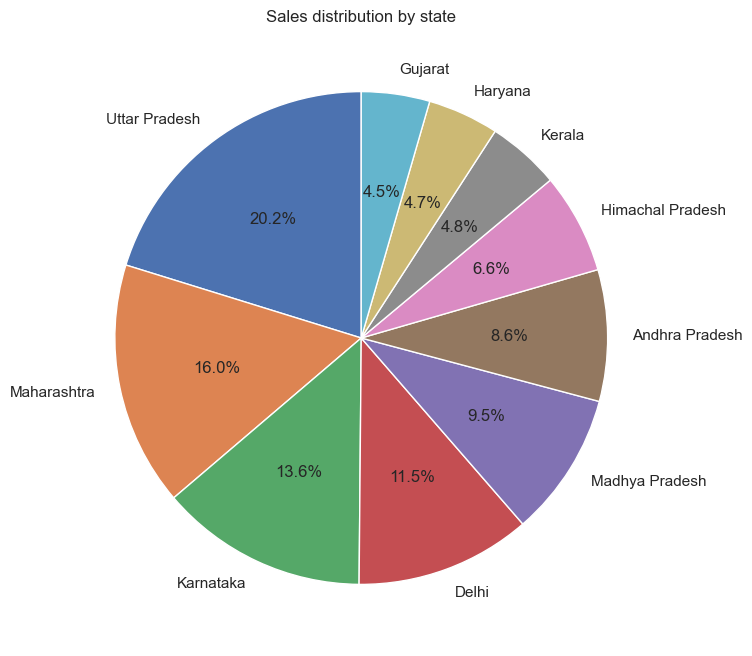

In [393]:
# Grouping by 'State' and adding the 'Orders'
state_sales = df.groupby('State')['Orders'].sum().reset_index()

# Sorting by Amount in descending order and selecting top 10
top_10_states = state_sales.sort_values(by='Orders', ascending=False).head(10)

# Plotting the pie chart for top 10 states
plt.figure(figsize=(8, 8))
plt.pie(top_10_states['Orders'], labels=top_10_states['State'], autopct='%1.1f%%', startangle=90)
plt.title('Sales distribution by state')
plt.show()

<Axes: xlabel='State', ylabel='Amount'>

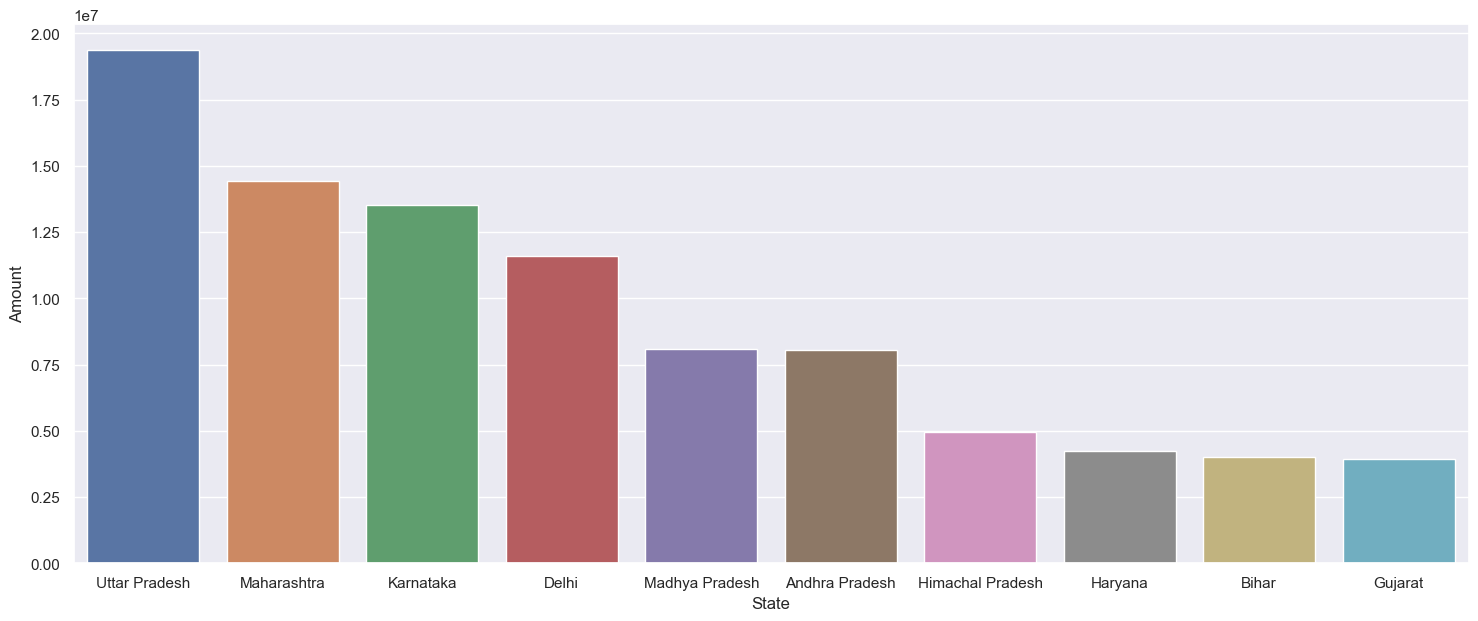

In [394]:
# Total sales from top 10 states ( Amount )

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(18,7)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

From the above graph we can see that maximum amount or sales are from UP, Maharashtra and Karnataka

# **Marital Status**

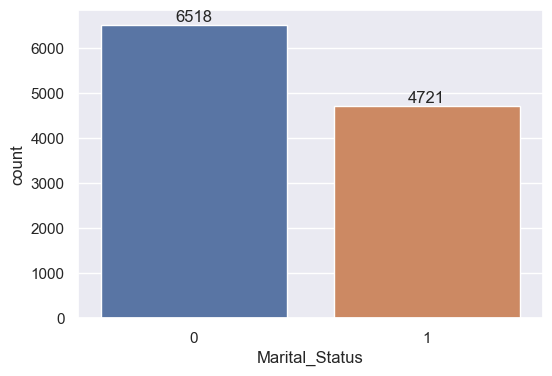

In [405]:
ax = sns.countplot(data = df, x = 'Marital_Status')

for bars in ax.containers:
    ax.bar_label(bars)
    
sns.set(rc={'figure.figsize':(6,5)})


<Axes: xlabel='Marital_Status', ylabel='Amount'>

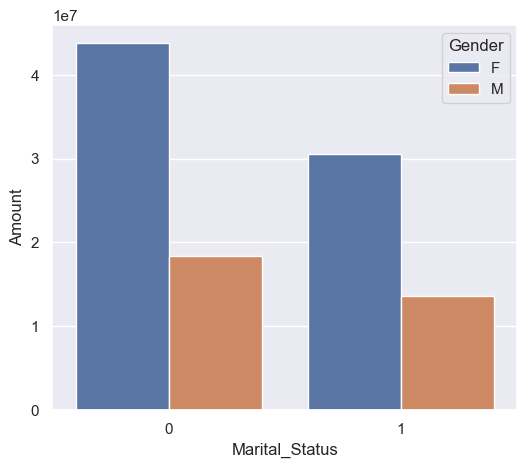

In [396]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

From the above graph we can see most of the buyers are *Married Womens* and also they have high purchasing power

# **Occupation**

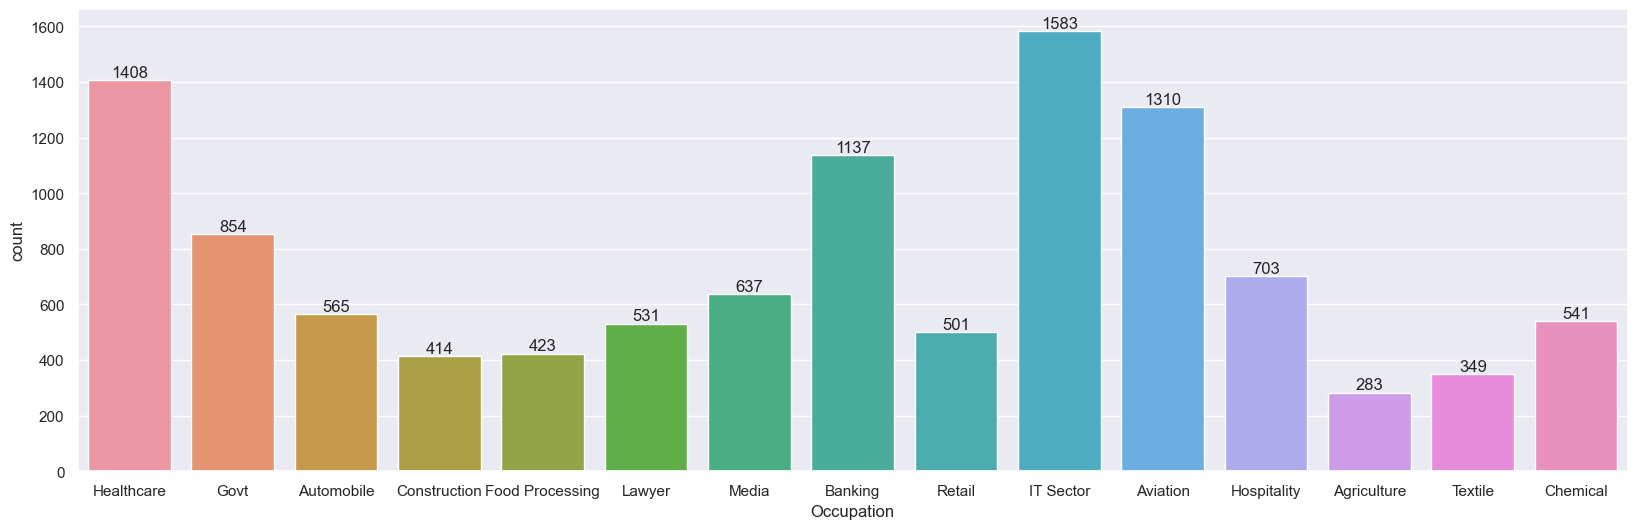

In [397]:
sns.set(rc={'figure.figsize':(20,6)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

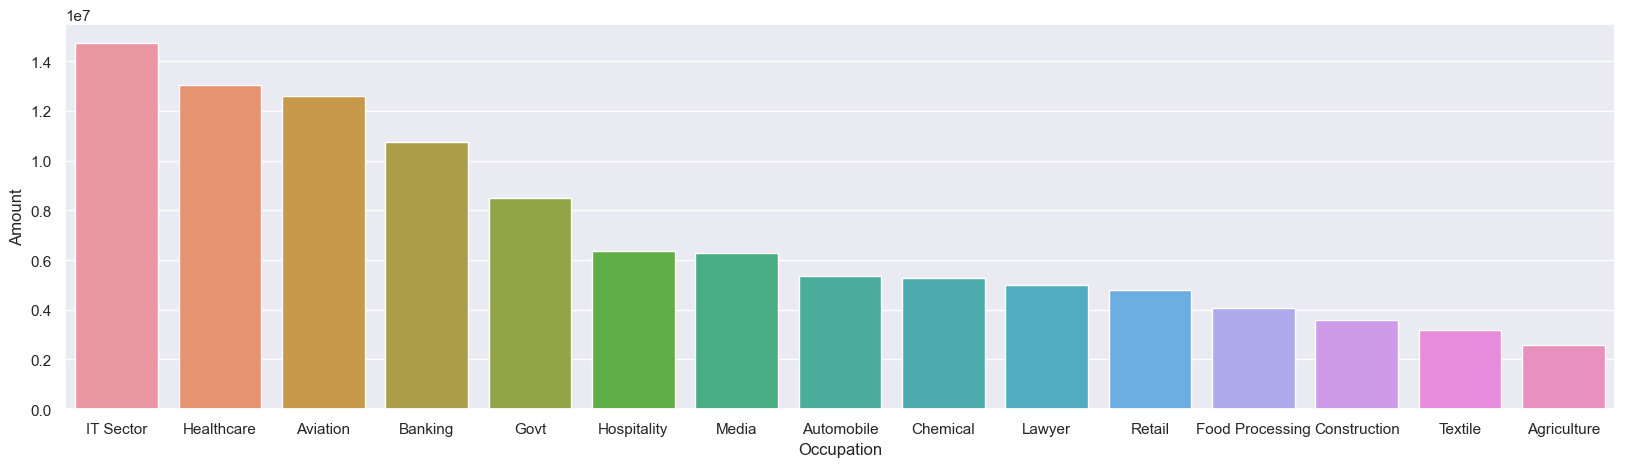

In [398]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

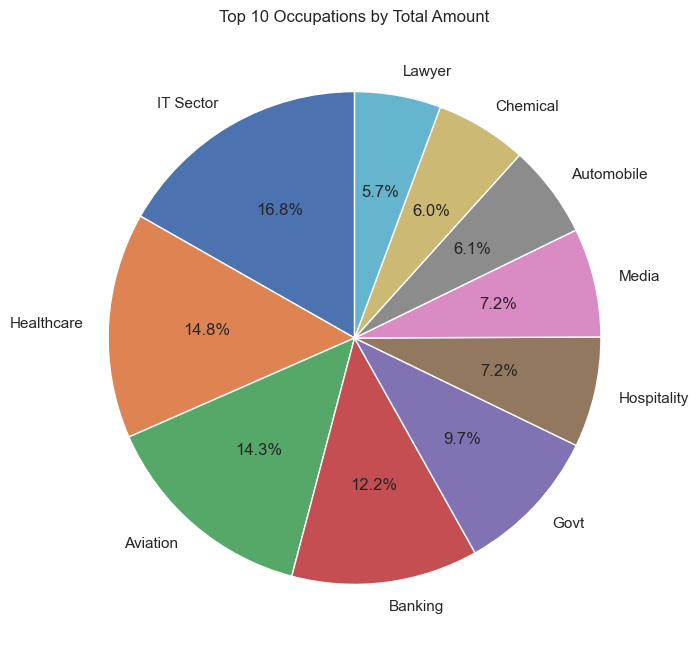

In [411]:
# Grouping by 'Occupation' and calculating the sum of 'Amount'
occupation = df.groupby('Occupation')['Amount'].sum().reset_index()

# Sorting by 'Amount' in descending order and selecting top 10 occupations
top_10_occupations = occupation.sort_values(by='Amount', ascending=False).head(10)

# Plotting the pie chart for top 10 occupations
plt.figure(figsize=(8, 8))
plt.pie(top_10_occupations['Amount'], labels=top_10_occupations['Occupation'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Occupations by Total Amount')
plt.show()

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

# **Product Category**

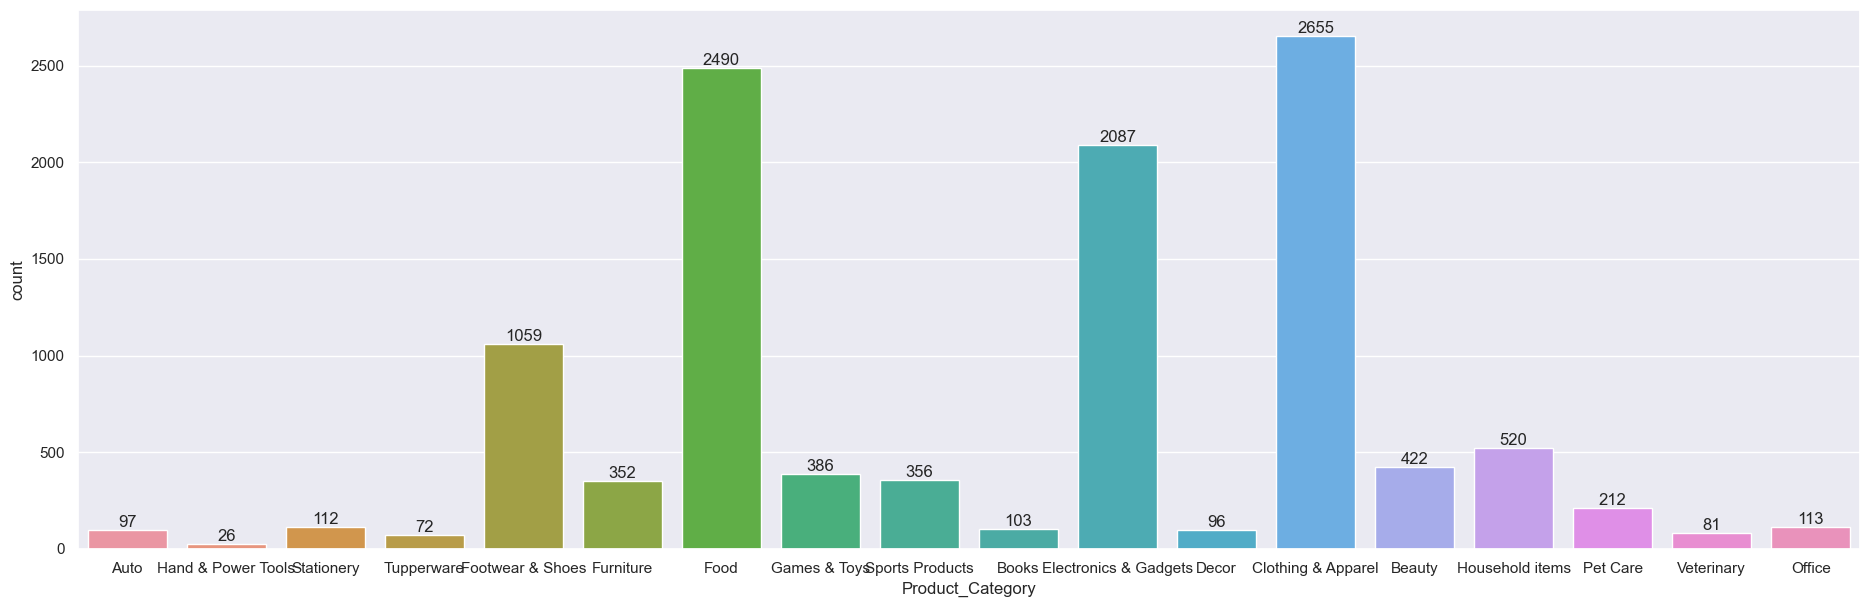

In [399]:
sns.set(rc={'figure.figsize':(23,7)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

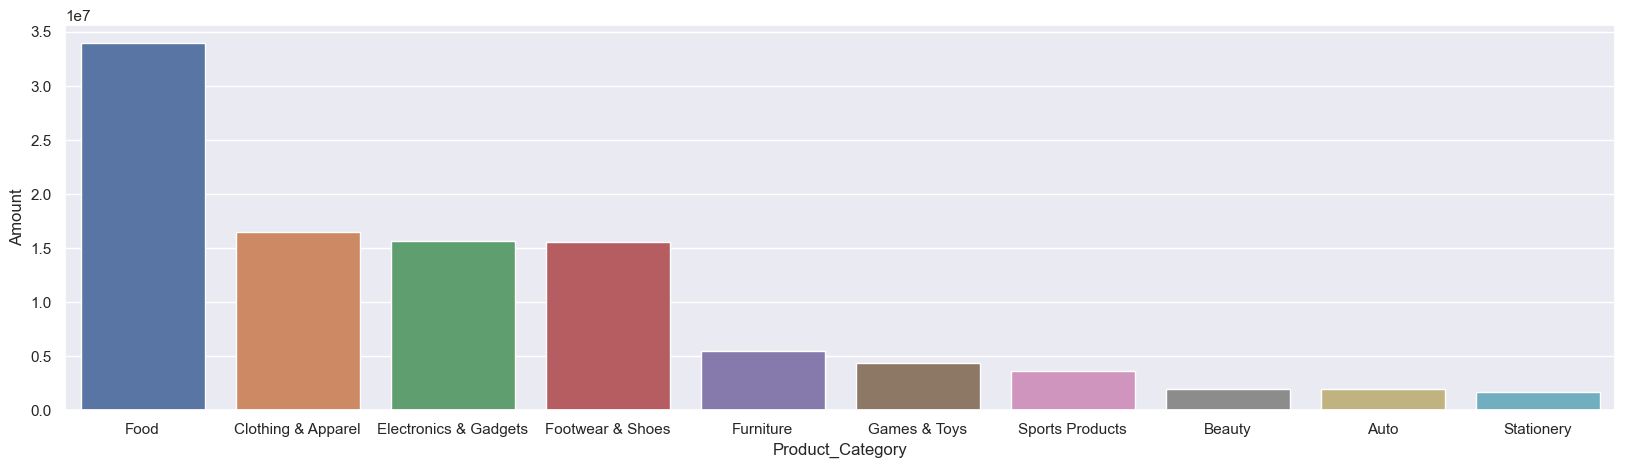

In [400]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

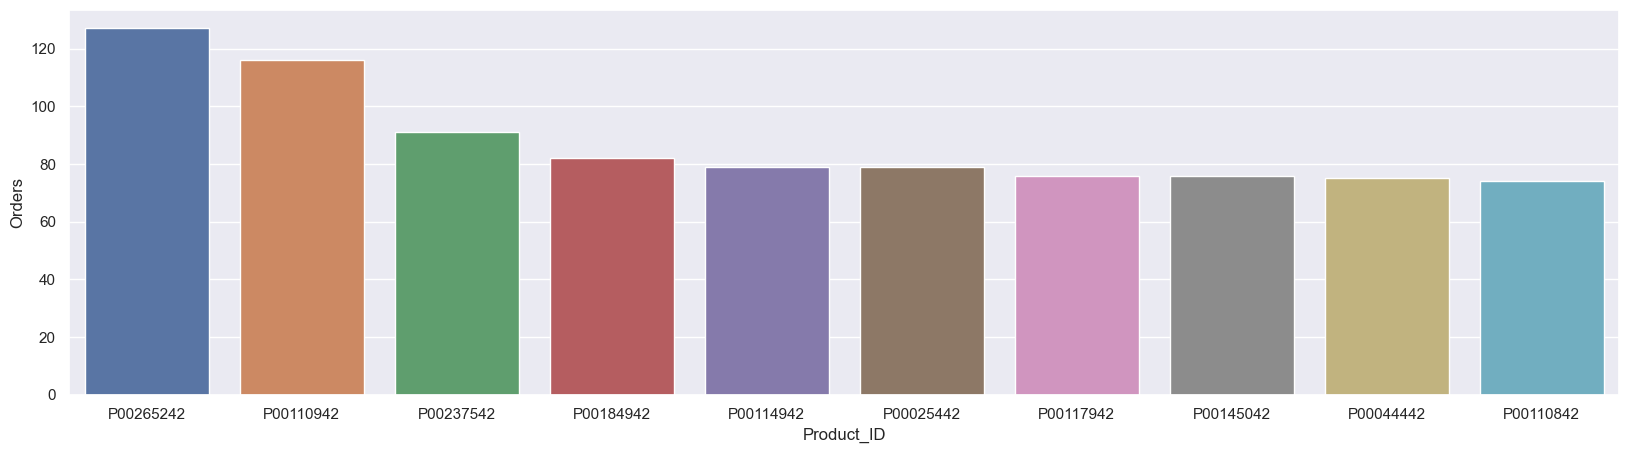

In [401]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')


So, basically, these are the most sold products

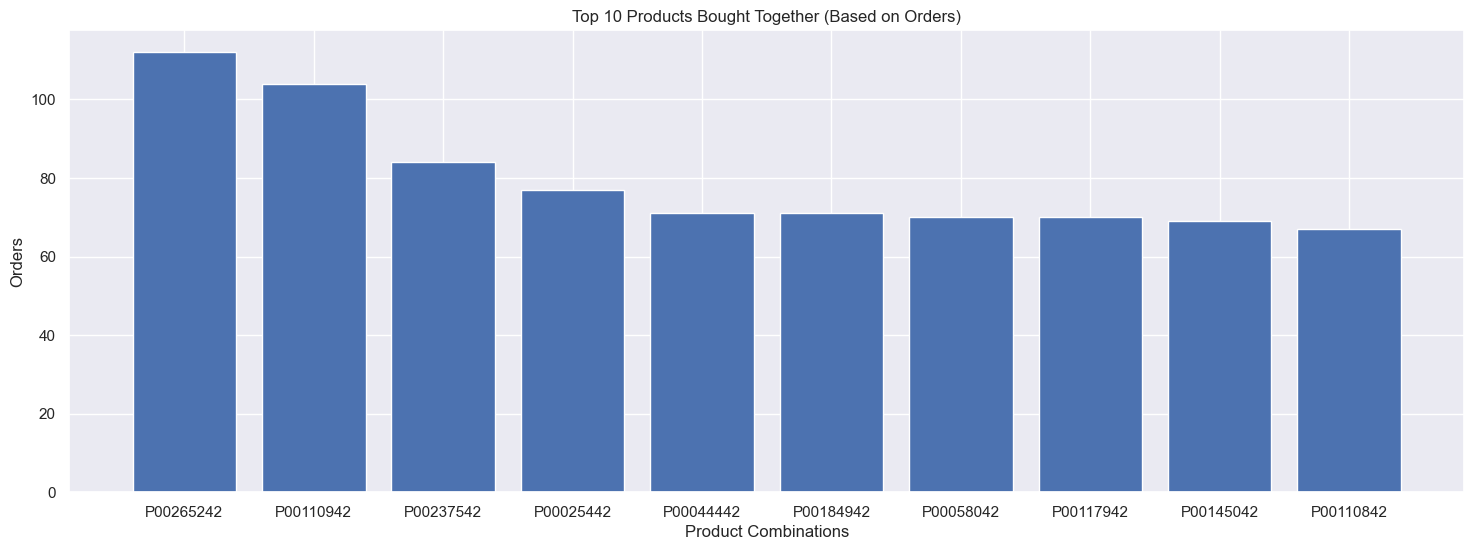

In [431]:
# Grouping by 'User_Id' and 'Product_ID' and summing 'Orders'
product_combinations = df.groupby(['User_ID', 'Product_ID'])['Orders'].sum().reset_index(name='Orders')

# Filtering out combinations with Orders less than 2 (ignoring count 1)
product_combinations_filtered = product_combinations[product_combinations['Orders'] > 1]

# Finding top 10 product combinations
top_10_products = product_combinations_filtered.groupby('Product_ID')['Orders'].sum().nlargest(10).reset_index()

# Plotting a bar chart for top 10 product combinations
plt.figure(figsize=(18, 6))
plt.bar(top_10_products['Product_ID'], top_10_products['Orders'])
plt.xlabel('Product Combinations')
plt.ylabel('Orders')
plt.title('Top 10 Products Bought Together (Based on Orders)')
plt.show()

So we can see these are the product id's which are getting frequently bought together.

# Conclusion

**Customer Target Profile:**

Married women aged 26-35 years.

Residing in Uttar Pradesh (UP), Maharashtra, and Karnataka.

Employed in the IT, healthcare, and aviation sectors.

**Preferred Product Categories:**

Strong preference for products in the food, clothing, and electronics categories.

**Regional Sales Insights:**

Sales in Haryana, Gujarat, and Bihar are comparatively lower than in other states.
Strategic efforts are required to boost sales in these regions.
Frequently Bought Together Products:

**Most Sold Products:**

P00265242
P00110942
P00237542

**Least Sold Products:**

P00145042
P00044442
P00110842